## (i) PCA of 5 comp

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [22]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

X_flat = X.reshape(X.shape[0], -1) #1d array

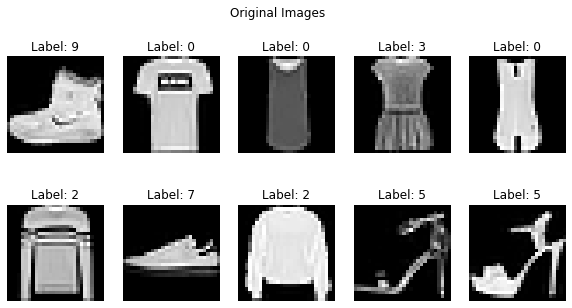

In [35]:
# original images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.suptitle('Original Images')
plt.show()

In [36]:
# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_flat)

X_reconstructed = pca.inverse_transform(X_pca).reshape(-1, 28, 28)

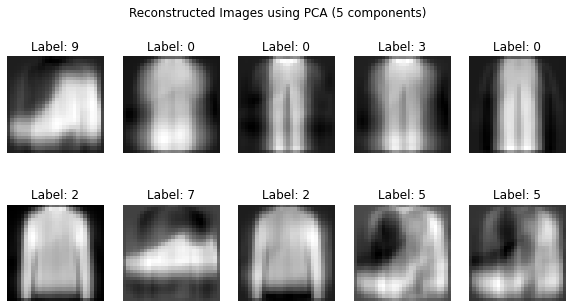

In [37]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_reconstructed[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.suptitle('Reconstructed Images using PCA (5 components)')
plt.show()

## (ii) to check data is balanced or not?

In [26]:
from collections import Counter
y = np.concatenate((y_train, y_test))
label_counts = Counter(y)   #to count occurence of each label

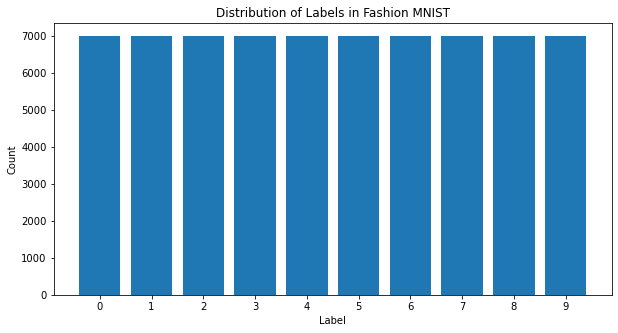

In [27]:
plt.figure(figsize=(10, 5))
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks(np.arange(10))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in Fashion MNIST')
plt.show()

In [28]:
min_count = min(label_counts.values())
max_count = max(label_counts.values())
balance_threshold = 0.8  # Threshold 

if min_count / max_count >= balance_threshold:
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")

The dataset is balanced.


## (iii) Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8439


## (iv) change pca from 10 to 510 and comparing accuracy
